<a href="https://colab.research.google.com/github/aebongbing/ESAA/blob/main/20231006__%EC%84%B8%EC%85%98_%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

# 혼동 행렬 생성
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[337  20]
 [ 30 182]]


* 정확도

In [3]:
from sklearn.metrics import accuracy_score

# 정확도 계산
accuracy = accuracy_score(y, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9121265377855887


* 정밀도

In [4]:
from sklearn.metrics import precision_score

# 정밀도 계산
precision = precision_score(y, y_pred)

print("Precision:", precision)

Precision: 0.900990099009901


* 재현율

In [5]:
from sklearn.metrics import recall_score

# 재현율 계산
recall = recall_score(y, y_pred)

print("Recall:", recall)

Recall: 0.8584905660377359


* F1 score

In [6]:
from sklearn.metrics import f1_score

# F1 점수 계산
f1 = f1_score(y, y_pred)

print("F1 Score:", f1)

F1 Score: 0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [7]:
from sklearn.preprocessing import Binarizer
# 모델에서 클래스 1을 예측할 확률을 가져옵니다.
pred_proba = model_lor.predict_proba(X)[:, 1]

# 예측 확률이 0.1보다 크면 1로, 그렇지 않으면 0으로 예측합니다.
y_pred2 = (pred_proba > 0.1).astype(int)

In [8]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 혼동 행렬
cm2 = confusion_matrix(y, y_pred2)
print("Confusion Matrix:")
print(cm2)

# 정확도
accuracy2 = accuracy_score(y, y_pred2)
print("Accuracy:", accuracy2)

# 정밀도
precision2 = precision_score(y, y_pred2)
print("Precision:", precision2)

# 재현율
recall2 = recall_score(y, y_pred2)
print("Recall:", recall2)

# F1 점수
f1_2 = f1_score(y, y_pred2)
print("F1 Score:", f1_2)

Confusion Matrix:
[[267  90]
 [  6 206]]
Accuracy: 0.8312829525483304
Precision: 0.6959459459459459
Recall: 0.9716981132075472
F1 Score: 0.8110236220472441


* ROC 곡선 시각화

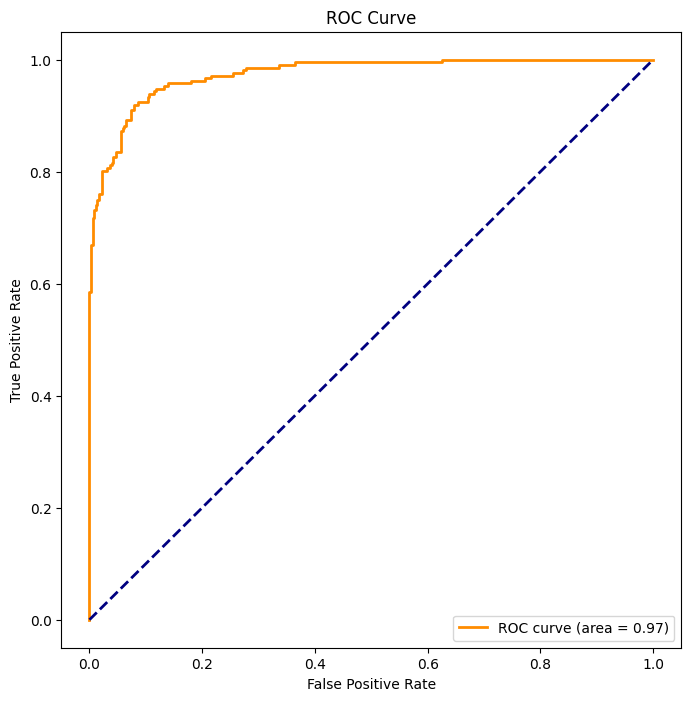

In [9]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 모델에서 클래스 1을 예측할 확률을 가져옵니다.
pred_proba = model_lor.predict_proba(X)[:, 1]

# ROC 곡선을 계산합니다.
fpr, tpr, thresholds = roc_curve(y, pred_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선을 시각화합니다.
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

* ROC AUC 값

In [10]:
# ROC 곡선을 계산합니다.
fpr, tpr, thresholds = roc_curve(y, pred_proba)
roc_auc = auc(fpr, tpr)

# 출력
print("ROC AUC:", roc_auc)

ROC AUC: 0.9741424871835527
